In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn-darkgrid")
%matplotlib inline

In [2]:
veri=pd.read_csv("/data/51_Startups.csv")

In [3]:
veri.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
veri=veri.drop("State",axis=True)

<AxesSubplot:>

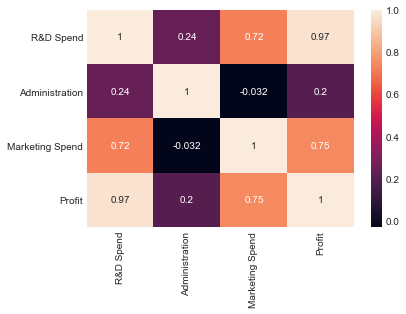

In [5]:
corr=veri.corr()
sns.heatmap(corr,annot=True)

In [6]:
X=veri.drop("Profit",axis=1)
y=veri["Profit"]

In [7]:
X.head(9)

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
scaler=StandardScaler()
X= scaler.fit_transform(X)
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [10]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=regressor.predict(X_test).round(1)
calculation=pd.DataFrame(np.c_[y_test,y_pred],columns=["Original Profit","Predict Profit"])
calculation.head(10)

,Original Profit,Predict Profit
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9
5,105008.31,115166.6
6,81229.06,67113.6
7,97483.56,98154.8
8,110352.25,114756.1
9,166187.94,169064.0


In [12]:
print("Öğrenme keskinliği : ",regressor.score(X_train,y_train))
print("Test keskinliği : ",regressor.score(X_test,y_test))

Öğrenme keskinliği :  0.9499572530324031
Test keskinliği :  0.9393955917820569


In [13]:
regressor.intercept_

42989.00816508666

In [14]:
regressor.coef_

array([0.77884104, 0.0293919 , 0.03471025])

In [19]:
#model test etme
feature=[165349.20,136897.80,471784.10]
scale_feature=scaler.transform([feature])


In [20]:
y_pred_test=regressor.predict(scale_feature)
y_pred_test

array([42990.66987463])